In [331]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
import datetime 
import time
%matplotlib inline
from IPython import get_ipython
ipython = get_ipython()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [330]:
df = pd.read_csv('../Resources/nycsat.csv')
df.head()

,school_id,school_name,borough,building_code,street_address,city,State,zip_code,latitude,longitude,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,1,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,1,NY,10002,40.86605,-73.92486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,1,NY,10002,40.71873,-73.97943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
df.dropna(how='any').shape
#drop na values for any row that has any 'na' then gives me the shape

(0, 38)

In [328]:
df.head()
#visualizes top 5 values

,school_id,school_name,borough,building_code,street_address,city,State,zip_code,latitude,longitude,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,1,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,1,NY,10002,40.86605,-73.92486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,1,NY,10002,40.71873,-73.97943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
import datetime
import numpy as np
def subtract_start_end(start_time, end_time):
    try:
        start_date = datetime.datetime.strptime(start_time, "%I:%M %p")
        end_date = datetime.datetime.strptime(end_time, "%I:%M %p")
        return (end_date-start_date).seconds/3600.
    except:
        print("{} {}".format(start_time, end_time))
        return np.nan

In [326]:
sat["date_diff"] = sat.apply(lambda row: subtract_start_end(row.start_time, row.end_time), axis=1)

AttributeError: ("'Series' object has no attribute 'start_time'", 'occurred at index 2')

In [319]:
sat = df.dropna(subset=['math_avg', 'reading_avg','writing_avg', 'final_sat','start_time', 'end_time', 'date_diff', 'percent_black', 'percent_white', 'percent_hispanic', 'percent_asian','percent_tested', 'enrollment',])
sat.head()
#call the table sat

KeyError: ['date_diff']

In [298]:
import datetime
import numpy as np
def subtract_start_end(start_time, end_time):
    try:
        start_date = datetime.datetime.strptime(start_time, "%I:%M %p")
        end_date = datetime.datetime.strptime(end_time, "%I:%M %p")
        return (end_date-start_date).seconds/3600.
    except:
        print("{} {}".format(start_time, end_time))
        return np.nan

In [299]:
sat["date_diff"] = sat.apply(lambda row: subtract_start_end(row.start_time, row.end_time), axis=1)

AttributeError: ("'Series' object has no attribute 'start_time'", 'occurred at index 2')

In [284]:
sat = pd.get_dummies(sat[['borough','percent_hispanic', 'percent_asian', 'percent_black', 'percent_tested', 'date_diff', 'enrollment','math_avg', 'writing_avg','reading_avg', 'final_sat']])

sat.head()

KeyError: "['borough'] not in index"

In [300]:
sat.columns

Index(['percent_hispanic', 'percent_asian', 'percent_black', 'percent_tested',
       'date_diff', 'enrollment', 'math_avg', 'writing_avg', 'reading_avg',
       'final_sat', 'borough_Bronx', 'borough_Brooklyn', 'borough_Manhattan',
       'borough_Queens', 'borough_Staten Island'],
      dtype='object')

In [286]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this
#r = sat.zip_code.values.reshape(-1, 1)
#q = sat.city.values.reshape(-1, 1)
s = sat.percent_hispanic.values.reshape(-1, 1)
t = sat.percent_asian.values.reshape(-1, 1)
u = sat.percent_black.values.reshape(-1, 1)
v = sat.percent_tested.values.reshape(-1, 1)
w = sat.date_diff.values.reshape(-1, 1)
X = sat.enrollment.values.reshape(-1, 1)
y = sat.final_sat.values.reshape(-1, 1)
#

In [301]:
y = sat["final_sat"].values.reshape(-1, 1)

X = sat[['percent_tested','enrollment','date_diff','borough_Bronx','borough_Brooklyn','start_time','end_time','borough_Manhattan','percent_black','percent_hispanic', 'percent_asian','borough_Queens','borough_Staten Island']]
#X.head()
print(X.shape, y.shape)




KeyError: "['end_time', 'start_time'] not in index"

In [302]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [303]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [304]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [305]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

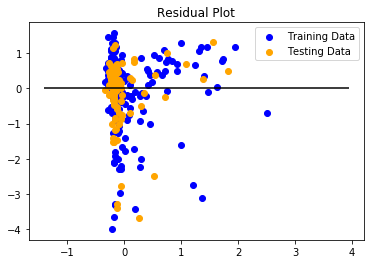

In [306]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [266]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[ 0.28079078  0.13516958  0.02683227  0.08681779 -0.12563757  0.1053354
  -0.57185054 -0.76494898 -0.0347826  -0.02834091 -0.07903873]]
y-axis intercept:  [2.9987968e-16]


In [267]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.36984532893595323, R2: 0.6129368636450392


In [268]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3813058734533977, R2: 0.6009427840712347


In [269]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.36989172192780617, R2: 0.6128883108703342


In [270]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3815041738442304, R2: 0.6007352519890075


In [58]:
#cause v comorbid 